In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display

In [2]:
armistead_df = pd.read_csv("../data/Armistead; 1975 - 2017 eastern Bering Sea Crab Distribution For Web.csv")

In [3]:
noaa_df = pd.read_csv(
    "../data/Detailed Crab Data From NOAA Fisheries Service Annual Eastern Bering Sea Summer Bottom Trawl Surveys 1975 - 2018.csv",
    dtype={'station': str, 'comments': str},
    low_memory=False)

In [4]:
merged = pd.merge(armistead_df, noaa_df, on=['cruise', 'haul'], how='inner')

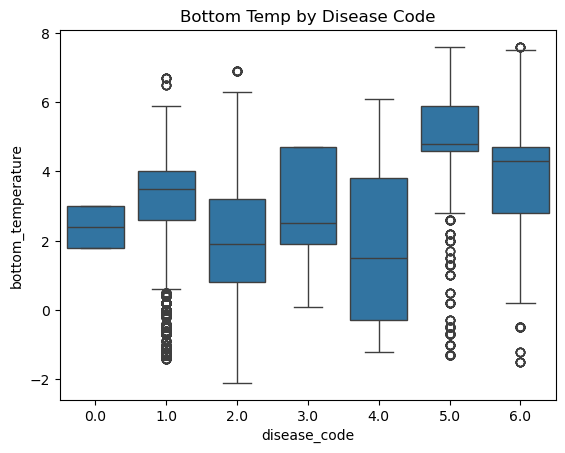

In [5]:
sns.boxplot(data=merged, x='disease_code', y='bottom_temperature')
plt.title('Bottom Temp by Disease Code')
plt.show()

In [6]:
diseased = merged[merged['disease_code'].notna()]

In [7]:
diseased

,station_id,survey_year,start_date,common_name,scientific_name,cpue,maturity_code,maturity_name,bottom_depth,surface_temperature,...,egg_condition,clutch_size,chela_height,disease_code,disease_dorsal,disease_ventral,disease_legs,weight,comments,merus_length
3675056,D-04,1980,1980-05-12T00:00:00.000,red king crab,Paralithodes camtschaticus,87,4,Legal,108,3.8,...,2.0,6.0,NaN,1.0,1.0,0.0,2.0,NaN,NaN,NaN
3675812,D-04,1980,1980-05-12T00:00:00.000,red king crab,Paralithodes camtschaticus,87,3,Mature male,108,3.8,...,2.0,6.0,NaN,1.0,1.0,0.0,2.0,NaN,NaN,NaN
3691686,D-04,1980,1980-05-12T00:00:00.000,red king crab,Paralithodes camtschaticus,87,8,Total male,108,3.8,...,2.0,6.0,NaN,1.0,1.0,0.0,2.0,NaN,NaN,NaN
3713761,H-23,1980,1980-06-16T00:00:00.000,blue king crab,Paralithodes platypus,113,3,Mature male,99,5.6,...,0.0,1.0,NaN,1.0,3.0,0.0,0.0,NaN,NaN,NaN
3713762,H-23,1980,1980-06-16T00:00:00.000,blue king crab,Paralithodes platypus,113,3,Mature male,99,5.6,...,0.0,1.0,NaN,1.0,5.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46467729,F-24,2017,2017-07-18T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,126,9.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
46467730,F-24,2017,2017-07-18T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,126,9.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
46467767,F-24,2017,2017-07-18T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,126,9.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
46467775,F-24,2017,2017-07-18T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,126,9.0,...,0.0,0.0,NaN,2.0,NaN,NaN,NaN,6.0,NaN,NaN


In [8]:
print(sorted(noaa_df['cruise'].unique()))       
print(sorted(armistead_df['cruise'].unique()))

[197501, 197502, 197601, 197602, 197700, 197703, 197801, 197802, 197901, 197902, 198001, 198002, 198101, 198103, 198201, 198202, 198203, 198301, 198303, 198401, 198402, 198501, 198502, 198601, 198602, 198701, 198801, 198808, 198901, 199001, 199101, 199201, 199301, 199401, 199501, 199601, 199701, 199801, 199901, 200001, 200101, 200201, 200301, 200401, 200402, 200501, 200601, 200701, 200801, 200901, 201001, 201002, 201101, 201201, 201202, 201301, 201401, 201501, 201601, 201701, 201801]
[197502, 197601, 197602, 197703, 197801, 197802, 197901, 197902, 198001, 198002, 198101, 198103, 198201, 198203, 198301, 198303, 198401, 198402, 198501, 198601, 198602, 198701, 198801, 198901, 199001, 199101, 199201, 199301, 199401, 199501, 199601, 199701, 199801, 199901, 200001, 200101, 200201, 200301, 200401, 200501, 200601, 200701, 200801, 200901, 201001, 201101, 201201, 201301, 201401, 201501, 201601, 201701]


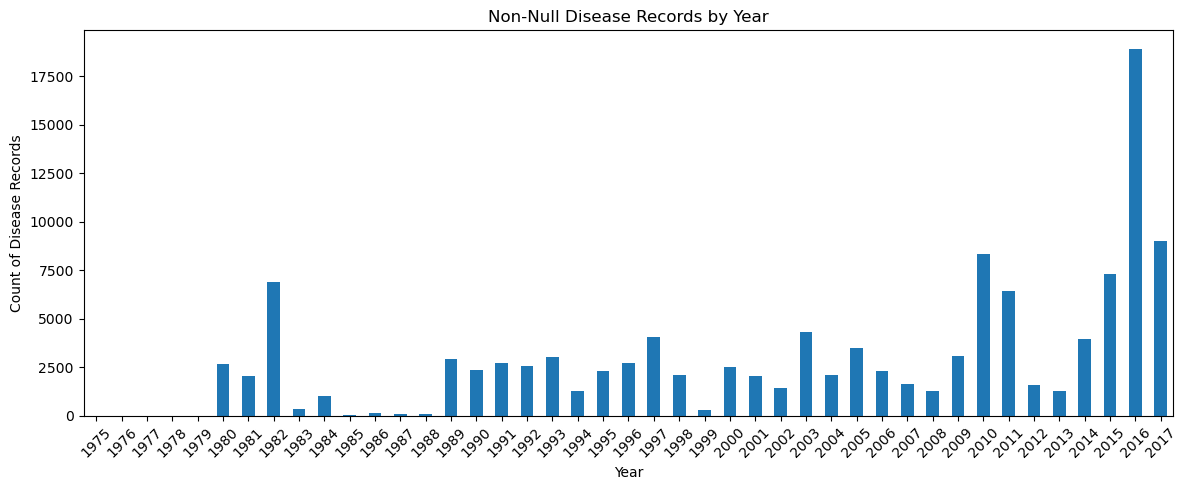

In [9]:
merged['year'] = merged['cruise'] // 100
merged['has_disease'] = merged['disease_code'].notna()

disease_by_year = merged.groupby('year')['has_disease'].sum()

disease_by_year.plot(kind='bar', figsize=(12, 5))
plt.title("Non-Null Disease Records by Year")
plt.ylabel("Count of Disease Records")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

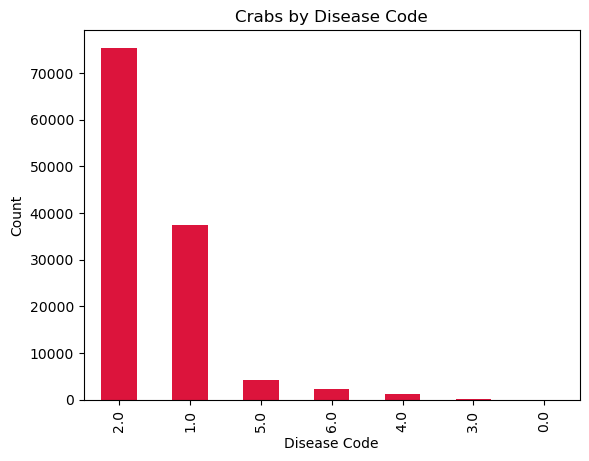

In [10]:
merged['disease_code'].value_counts().plot(kind='bar', color='crimson')
plt.title('Crabs by Disease Code')
plt.xlabel('Disease Code')
plt.ylabel('Count')
plt.show()

In [11]:
merged['dorsal_level'] = pd.cut(merged['disease_dorsal'], bins=[-1,0,2,4,9], labels=['None','Mild','Moderate','Severe'])
merged['ventral_level'] = pd.cut(merged['disease_ventral'], bins=[-1,0,2,4,9], labels=['None','Mild','Moderate','Severe'])
merged['legs_level'] = pd.cut(merged['disease_legs'], bins=[-1,0,2,4,9], labels=['None','Mild','Moderate','Severe'])

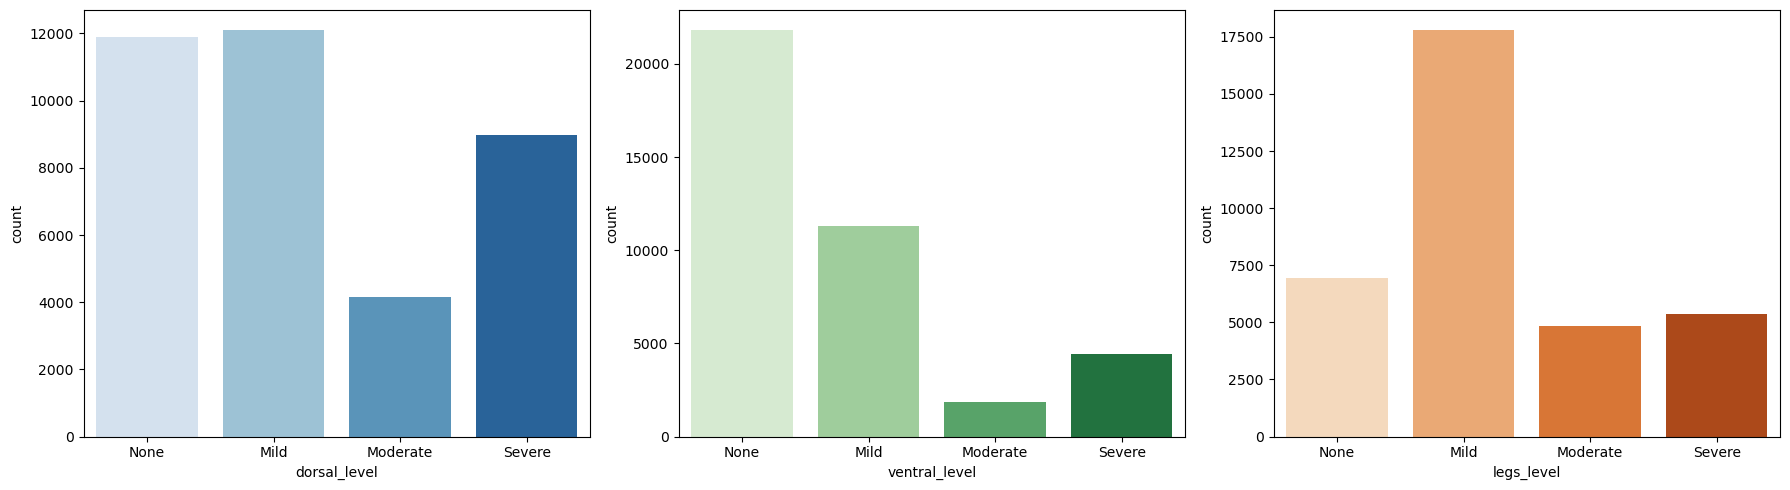

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(data=merged, x='dorsal_level', hue='dorsal_level', ax=axs[0], palette='Blues', legend=False)
sns.countplot(data=merged, x='ventral_level', hue='ventral_level', ax=axs[1], palette='Greens', legend=False)
sns.countplot(data=merged, x='legs_level', hue='legs_level', ax=axs[2], palette='Oranges', legend=False)

plt.tight_layout()
plt.show()

In [13]:
severe_dorsal = merged[merged['disease_dorsal'] >= 4.0]
severe_dorsal.head()

,station_id,survey_year,start_date,common_name,scientific_name,cpue,maturity_code,maturity_name,bottom_depth,surface_temperature,...,disease_ventral,disease_legs,weight,comments,merus_length,year,has_disease,dorsal_level,ventral_level,legs_level
3713762,H-23,1980,1980-06-16T00:00:00.000,blue king crab,Paralithodes platypus,113,3,Mature male,99,5.6,...,0.0,0.0,NaN,NaN,NaN,1980,True,Severe,None,None
3713763,H-23,1980,1980-06-16T00:00:00.000,blue king crab,Paralithodes platypus,113,3,Mature male,99,5.6,...,0.0,0.0,NaN,NaN,NaN,1980,True,Severe,None,None
3713895,H-23,1980,1980-06-16T00:00:00.000,blue king crab,Paralithodes platypus,113,3,Mature male,99,5.6,...,0.0,0.0,NaN,NaN,NaN,1980,True,Severe,None,None
3713900,H-23,1980,1980-06-16T00:00:00.000,blue king crab,Paralithodes platypus,113,3,Mature male,99,5.6,...,0.0,0.0,NaN,NaN,NaN,1980,True,Severe,None,None
3713951,H-23,1980,1980-06-16T00:00:00.000,blue king crab,Paralithodes platypus,113,3,Mature male,99,5.6,...,0.0,0.0,NaN,NaN,NaN,1980,True,Moderate,None,None


In [14]:
merged['has_disease'] = merged['disease_code'].notna()
merged['depth_bin'] = pd.cut(merged['bottom_depth'], bins=[0, 50, 100, 150, 200, 300, 500])
depth_disease_rate = merged.groupby('depth_bin', observed=True)['has_disease'].mean().reset_index()

In [15]:
merged

,station_id,survey_year,start_date,common_name,scientific_name,cpue,maturity_code,maturity_name,bottom_depth,surface_temperature,...,disease_legs,weight,comments,merus_length,year,has_disease,dorsal_level,ventral_level,legs_level,depth_bin
0,C-09,1975,1975-06-02T00:00:00.000,red king crab,Paralithodes camtschaticus,276,1,Immature male,53,4.5,...,NaN,NaN,NaN,NaN,1975,False,NaN,NaN,NaN,"(50, 100]"
1,C-09,1975,1975-06-02T00:00:00.000,red king crab,Paralithodes camtschaticus,276,1,Immature male,53,4.5,...,NaN,NaN,NaN,NaN,1975,False,NaN,NaN,NaN,"(50, 100]"
2,C-09,1975,1975-06-02T00:00:00.000,red king crab,Paralithodes camtschaticus,276,1,Immature male,53,4.5,...,NaN,NaN,NaN,NaN,1975,False,NaN,NaN,NaN,"(50, 100]"
3,C-09,1975,1975-06-02T00:00:00.000,red king crab,Paralithodes camtschaticus,276,1,Immature male,53,4.5,...,NaN,NaN,NaN,NaN,1975,False,NaN,NaN,NaN,"(50, 100]"
4,C-09,1975,1975-06-02T00:00:00.000,red king crab,Paralithodes camtschaticus,276,1,Immature male,53,4.5,...,NaN,NaN,NaN,NaN,1975,False,NaN,NaN,NaN,"(50, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46468505,G-21,2017,2017-07-06T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,66,7.0,...,NaN,NaN,NaN,NaN,2017,False,NaN,NaN,NaN,"(50, 100]"
46468506,G-21,2017,2017-07-06T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,66,7.0,...,NaN,NaN,NaN,NaN,2017,False,NaN,NaN,NaN,"(50, 100]"
46468507,G-21,2017,2017-07-06T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,66,7.0,...,NaN,NaN,NaN,NaN,2017,False,NaN,NaN,NaN,"(50, 100]"
46468508,G-21,2017,2017-07-06T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,66,7.0,...,NaN,NaN,NaN,NaN,2017,False,NaN,NaN,NaN,"(50, 100]"


<Axes: xlabel='depth_bin', ylabel='has_disease'>

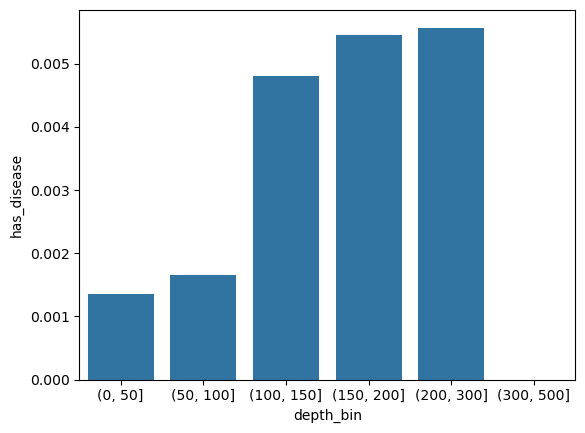

In [16]:
sns.barplot(data=depth_disease_rate, x='depth_bin', y='has_disease')

In [17]:
diseased

,station_id,survey_year,start_date,common_name,scientific_name,cpue,maturity_code,maturity_name,bottom_depth,surface_temperature,...,egg_condition,clutch_size,chela_height,disease_code,disease_dorsal,disease_ventral,disease_legs,weight,comments,merus_length
3675056,D-04,1980,1980-05-12T00:00:00.000,red king crab,Paralithodes camtschaticus,87,4,Legal,108,3.8,...,2.0,6.0,NaN,1.0,1.0,0.0,2.0,NaN,NaN,NaN
3675812,D-04,1980,1980-05-12T00:00:00.000,red king crab,Paralithodes camtschaticus,87,3,Mature male,108,3.8,...,2.0,6.0,NaN,1.0,1.0,0.0,2.0,NaN,NaN,NaN
3691686,D-04,1980,1980-05-12T00:00:00.000,red king crab,Paralithodes camtschaticus,87,8,Total male,108,3.8,...,2.0,6.0,NaN,1.0,1.0,0.0,2.0,NaN,NaN,NaN
3713761,H-23,1980,1980-06-16T00:00:00.000,blue king crab,Paralithodes platypus,113,3,Mature male,99,5.6,...,0.0,1.0,NaN,1.0,3.0,0.0,0.0,NaN,NaN,NaN
3713762,H-23,1980,1980-06-16T00:00:00.000,blue king crab,Paralithodes platypus,113,3,Mature male,99,5.6,...,0.0,1.0,NaN,1.0,5.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46467729,F-24,2017,2017-07-18T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,126,9.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
46467730,F-24,2017,2017-07-18T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,126,9.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
46467767,F-24,2017,2017-07-18T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,126,9.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
46467775,F-24,2017,2017-07-18T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,126,9.0,...,0.0,0.0,NaN,2.0,NaN,NaN,NaN,6.0,NaN,NaN


In [18]:
# diseased.to_csv("diseased_crabs.csv", index=False)

In [19]:
# merged.to_csv("merged.csv", index=False)